# Ensemble Learning 

The goal of ensemble methods is to combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone.

* Bagging
* Boosting 

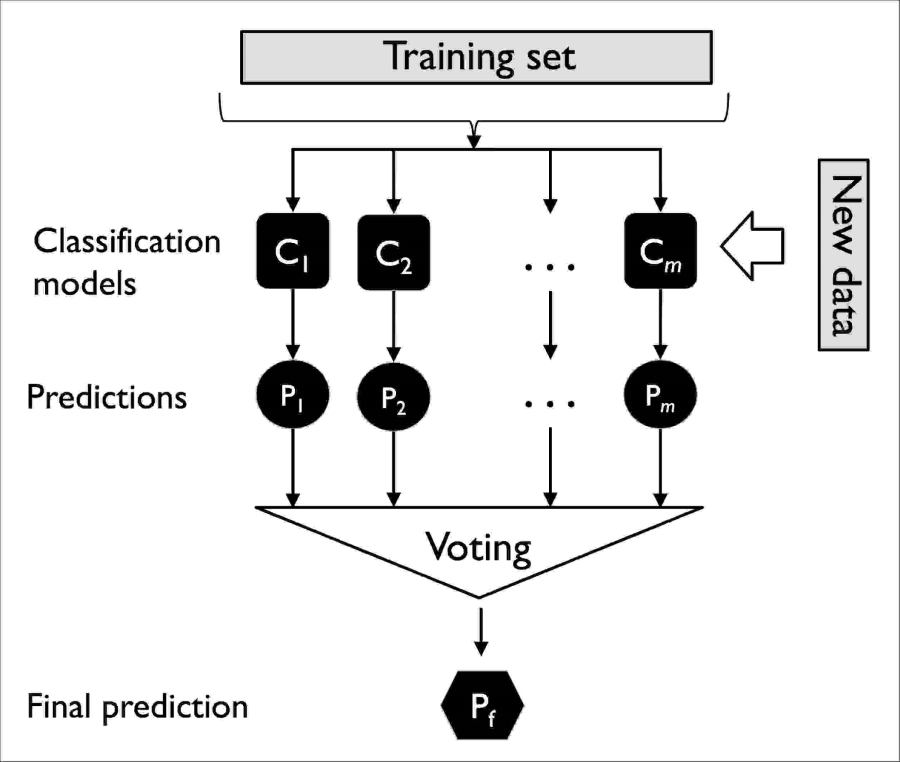

#  Bagging 

Ensemble of classifiers from bootstrap samples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',header=None)

In [4]:
df_wine.shape

(178, 14)

In [5]:
#renaming the columns
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [6]:
#view the dataset
df_wine.head(3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [7]:
#count the number of values of target variable
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [9]:
# Make it binary classification from multiclassification ( drop label 3 )
df=df_wine[df_wine['Class label']!=3]

In [10]:
#validate the shape of new dataset
df.shape

(130, 14)

In [12]:
#create input dataset
X=df.loc[:,df.columns !='Class label']

In [13]:
#create output colum
y=df['Class label']

In [14]:
#validate shape of input data
X.shape

(130, 13)

In [15]:
#validate shape on y
y.shape

(130,)

In [16]:
#import train test split function
from sklearn.cross_validation import train_test_split

In [17]:
#split the data into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39,stratify=y)

In [20]:
#import the ensembling classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
#train the baseline estimator /classifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)

In [43]:
#train the ensebled classifier
bag = BaggingClassifier(base_estimator=tree,n_estimators=500, max_samples=1.0, max_features=13,
                        bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

In [44]:
#import Accuracy parameter from metrics
from sklearn.metrics import accuracy_score

### Decision Tree Results 

In [24]:
#fit the baseline model on training data
tree = tree.fit(X_train, y_train)

In [25]:
#make predictions on training data
y_train_pred = tree.predict(X_train)

In [26]:
#make prediction on test data
y_test_pred = tree.predict(X_test)

In [27]:
#calculate score/accuracy on training data
tree_train = accuracy_score(y_train, y_train_pred)

In [28]:
#calculate score on test data
tree_test = accuracy_score(y_test, y_test_pred)

In [29]:
#accuracy on training data
print(tree_train)

1.0


In [30]:
#accuracy on test data 
print(tree_test)

0.969696969697


### Bagging Results 

In [45]:
#fit the bagging model on training data
bag = bag.fit(X_train, y_train)

In [46]:
#make prediction on training data 
y_train_pred = bag.predict(X_train)

In [47]:
#make predictions on test data
y_test_pred = bag.predict(X_test)

In [40]:
#calculate the accuracy on training data 
bag_train = accuracy_score(y_train, y_train_pred)

In [41]:
#training accuracy
print(bag_train)

1.0


In [48]:
#calculate the accuracy on test data
bag_test=accuracy_score(y_test,y_test_pred)

In [49]:
#test accuracy 
print(bag_test)

0.969696969697


# Boosting

Ensemble consists of very simple base classifiers, also often referred to as weak learners

In [50]:
#import the Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

In [51]:
#Build the boosting classifier 
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=500, learning_rate=0.1,random_state=1)

In [52]:
#fit the classifier on training data
ada = ada.fit(X_train, y_train)

In [53]:
#prediction on training data
y_train_pred = ada.predict(X_train)

In [54]:
#predictions on test data
y_test_pred = ada.predict(X_test)

In [55]:
#calculate score on training data
ada_train = accuracy_score(y_train, y_train_pred)

In [56]:
#calculate score on test data 
ada_test=accuracy_score(y_test,y_test_pred)

In [57]:
print(ada_train)
print(ada_test)

1.0
0.939393939394
